8. Implementing a neural network for binary classification and test different activation functions like
ReLU, Sigmoid, and Tanh.

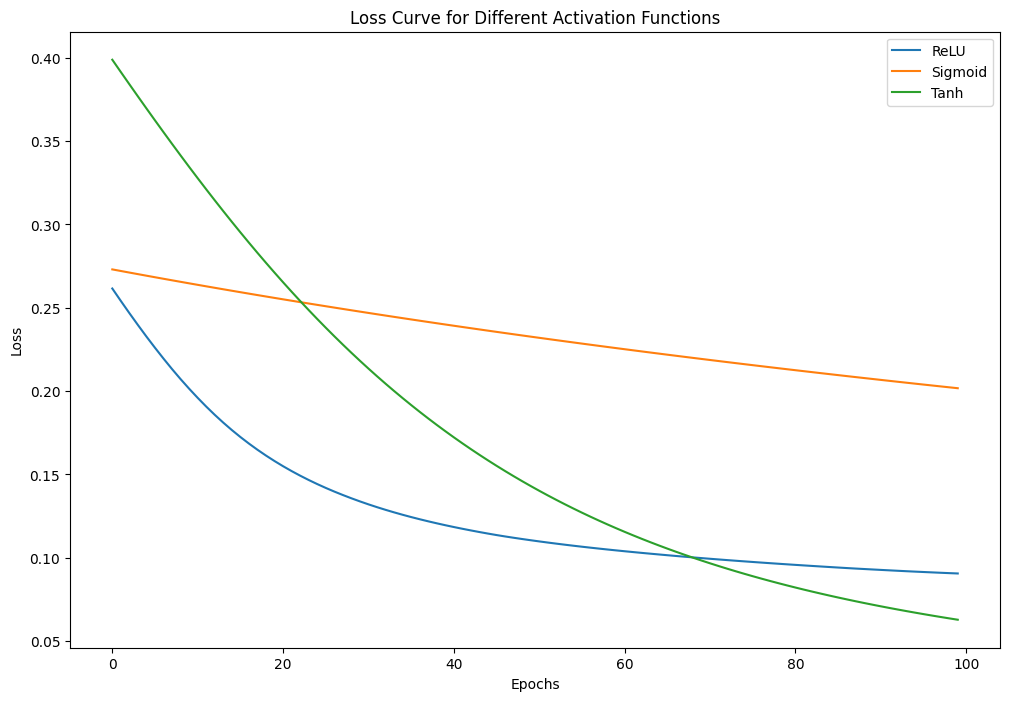

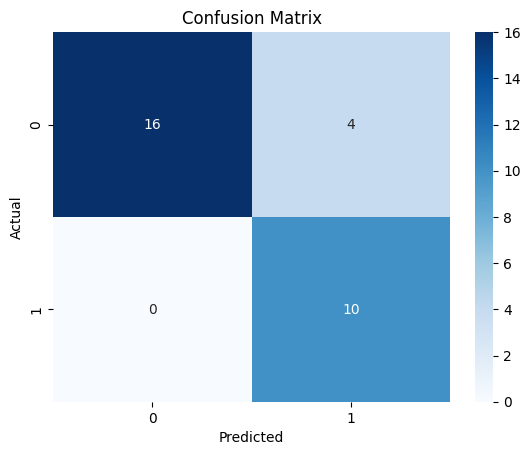

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Binary Classification (Setosa vs. Non-Setosa)
y_binary = (y == 0).astype(int)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Activation Functions
def relu(x): return np.maximum(0, x)
def sigmoid(x): return 1 / (1 + np.exp(-x))
def tanh(x): return np.tanh(x)

# Derivatives
def relu_deriv(x): return (x > 0).astype(float)
def sigmoid_deriv(x): return sigmoid(x) * (1 - sigmoid(x))
def tanh_deriv(x): return 1 - np.tanh(x)**2

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, activation, activation_deriv, lr=0.01):
        self.W1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim)
        self.b2 = np.zeros((1, output_dim))
        self.activation = activation
        self.activation_deriv = activation_deriv
        self.lr = lr

    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.activation(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = sigmoid(self.z2)  # Output layer activation for binary classification
        return self.a2

    def backward(self, X, y):
        m = y.shape[0]
        dz2 = self.a2 - y.reshape(-1, 1)
        dW2 = (self.a1.T @ dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        dz1 = (dz2 @ self.W2.T) * self.activation_deriv(self.z1)
        dW1 = (X.T @ dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Update weights
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=100):
        losses = []
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = np.mean((y - y_pred.flatten()) ** 2)
            losses.append(loss)
            self.backward(X, y)
        return losses

# Testing with different activation functions
activation_funcs = {'ReLU': (relu, relu_deriv), 'Sigmoid': (sigmoid, sigmoid_deriv), 'Tanh': (tanh, tanh_deriv)}
plt.figure(figsize=(12, 8))

for name, (act, act_deriv) in activation_funcs.items():
    nn = NeuralNetwork(4, 8, 1, act, act_deriv, lr=0.01)
    losses = nn.train(X_train, y_train, epochs=100)
    plt.plot(losses, label=f'{name}')

plt.title('Loss Curve for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix for the best performing model
best_nn = NeuralNetwork(4, 8, 1, relu, relu_deriv)
best_nn.train(X_train, y_train, epochs=100)
y_pred = (best_nn.forward(X_test) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
